![](thumbnail_marsilea.png){width=70% fig-align="center"}

# 들어가며

이 튜토리얼은 `Python`의 기본 지식을 갖고 있고 `NumPy`와 `Matplotlib`을 사용하는 방법을 알고 있다고 가정합니다. 특히 
`Matplotlib`에서 `Figure` 및 `Axes`의 개념에 대해 알고 있는 것이 좋습니다.

In [1]:
import warnings

import marsilea as ma
import marsilea.plotter as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 경고 무시
warnings.filterwarnings("ignore")
np.random.seed(42)

# 기본 개념

`Marsilea`는 멋진 레이아웃을 손쉽게 만들 수 있는 `Python` 패키지로 특히 다중 특성 데이터셋을 위해 설계되었습니다. 먼저 간단한 시각화를 만드는 작업부터 알아보겠습니다.

먼저, `ClusterBoard`를 만듭니다. 이것은 그림을 추가할 수 있는 빈 캔버스로, 높이는 2이고 여백은 0.5로 초기화됩니다. 여백은 시각화가 저장될 때 시각화가 잘릴 것을 방지하기 위해 캔버스 주위에 여백을 유지하는 데 사용될 수 있습니다. `Marsilea`에서는 지정되지 않은 경우 단위가 인치로 설정됩니다.

그런 다음 `add_layer()`를 사용하여 캔버스에 바이올린 플롯을 추가합니다. 마지막으로 `render()`를 호출하여 시각화를 그립니다.

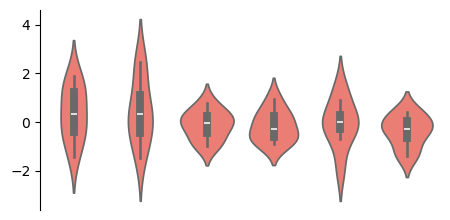

In [22]:
data = np.random.randn(8, 6)
cb = ma.ClusterBoard(data, height=2, margin=.5)
cb.add_layer(mp.Violin(data, color="#FF6D60"))
cb.render()

## 그룹화(Grouping)

그룹화(Grouping)를 사용하면 데이터를 그룹으로 분류하고 각 그룹에 대한 시각화를 할 수 있습니다. 우리는 `vsplit()` 함수를 사용하여 캔버스를 세 그룹으로 나눕니다. `labels` 매개변수는 각 열에 대한 그룹을 지정합니다. `order` 매개변수는 플롯에 표시될 그룹의 순서를 지정합니다. 이제 그룹을 시각적으로 더 명확하게 만들기 위해 측면 플롯을 추가해 봅시다. 여기서 `spacing`은 캔버스 너비의 일부분을 나타냅니다.

## 추가 구성 요소로 그룹 주석 달기

우리는 `add_top()`을 사용하여 캔버스 상단에 `Chunk` 플롯을 추가합니다. `Chunk` 플롯은 그룹을 주석 처리하는 데 사용되는 주석 플롯입니다. 추가로 `size` 및 `pad` 매개변수를 사용하여 플롯의 크기와 플롯 간의 간격을 조정할 수 있습니다. 단위는 인치입니다.

:::{.callout-note}
텍스트를 그리는 Chunk와 같은 플롯의 경우 플롯의 크기가 자동으로 텍스트에 맞게 조정되므로 플롯의 크기를 지정할 필요가 없습니다.
:::

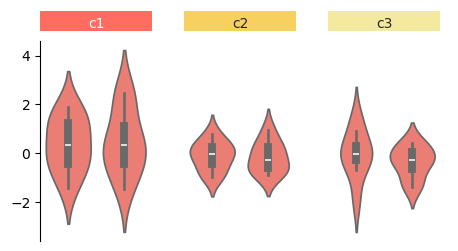

In [23]:
cb.vsplit(labels=["c1", "c1", "c2", "c2", "c3", "c3"],
          order=["c1", "c2", "c3"], spacing=.08)

group_labels = mp.Chunk(["c1", "c2", "c3"],
                        ["#FF6D60", "#F7D060", "#F3E99F"])
cb.add_top(group_labels, size=.2, pad=.1)
cb.render()

## 계층적 클러스터링

`add_dendrogram()`를 사용하여 캔버스 하단에 덴드로그램을 추가합니다. 덴드로그램은 계층적 클러스터링 과정을 기록한 나무 모양의 다이어그램입니다. Marsilea에서는 클러스터링이 히트맵에만 국한되지 않고 다양한 시각화에서 수행될 수 있습니다.

여기서 주목할 점은 그룹의 순서와 그룹 내 순서가 클러스터링 결과에 따라 자동으로 변경된다는 것입니다.

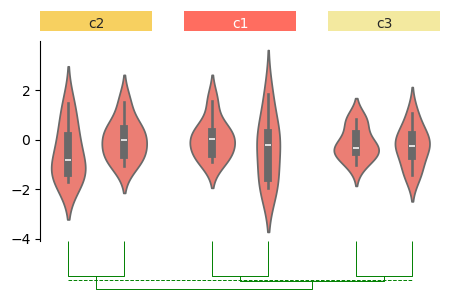

In [5]:
cb.add_dendrogram("bottom", colors="g")
cb.render()

## 하단 플롯 및 제목 추가

우리는 메인 시각화에 더 많은 플롯을 추가할 수 있습니다. 여기서는 바 플롯을 하단에 추가하고 `add_title()`을 사용하여 맨 위에 제목을 추가합니다.

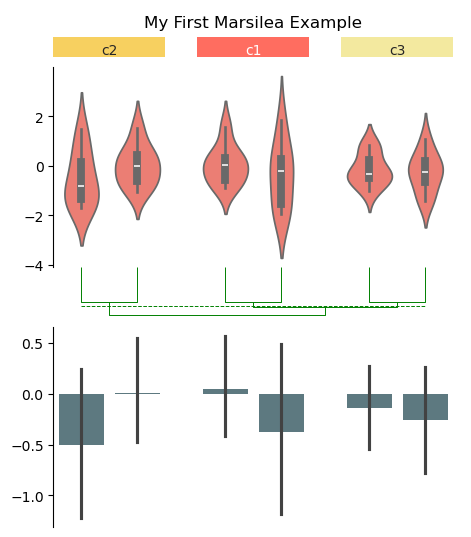

In [6]:
cb.add_bottom(ma.plotter.Bar(data, color="#577D86"), size=2, pad=.1)
cb.add_title(top="My First Marsilea Example")
cb.render()

## 저장하기

`save()`를 사용하여 파일로 저장할 수 있습니다.

```python
cb.save("my_first_marsilea_example.png")
```

또는 모든 맷플롯립 그림을 저장하는 방식과 동일하게 저장할 수 있습니다. `.figure.`로 figure 객체에 액세스할 수 있습니다. 잘려나가는 것을 피하기 위해 `bbox_inches="tight"` 모드로 저장하는 것이 권장됩니다. 또는 캔버스의 여백을 늘릴 수도 있습니다.

```python
cb.figure.savefig("my_first_marsilea_example.png", bbox_inches="tight")
```

## 요약

`Marsilea`에서 시각화를 제어하는 데 사용할 수 있는 메서드 목록입니다.

- 메인 레이어에 추가: `add_layer()`
- 측면에 추가:
  - 왼쪽: `add_left()`
  - 오른쪽: `add_right()`
  - 위쪽: `add_top()`
  - 아래쪽: `add_bottom()`
- 그룹화:
  - 수직 그룹화: `hsplit()`
  - 수평 그룹화: `vsplit()`
- 덴드로그램 추가: `add_dendrogram()`
- 제목 추가: `add_title()`
- 범례 추가: `add_legends()`
- 플롯 저장: `save()`

# SeqLogo

서열을 시각화하는 방법인 `SeqLogo` 그리기.

In [7]:
from marsilea.plotter import SeqLogo

matrix = pd.DataFrame(data=np.random.randint(1, 10, (4, 12)),
                      index=list("ACGT"))
matrix

,0,1,2,3,4,5,6,7,8,9,10,11
A,9,1,9,7,9,8,1,8,8,3,1,8
C,3,3,1,5,7,9,7,9,8,2,1,7
G,7,8,5,3,8,6,3,1,3,5,3,1
T,5,7,7,9,3,7,1,4,4,5,7,7


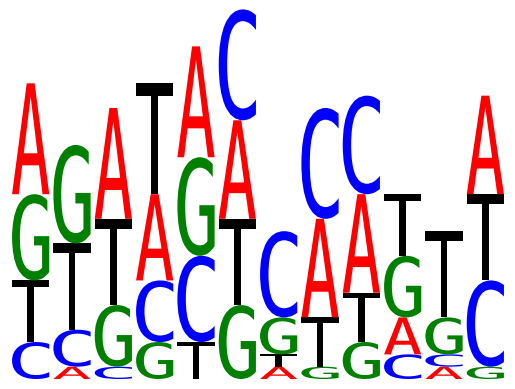

In [8]:
_, ax = plt.subplots()
colors = {"A": "r", "C": "b", "G": "g", "T": "black"}
SeqLogo(matrix, color_encode=colors).render(ax)

# 서열 분석(Sequence Alignment)

## 데이터 불러오기

데이터를 불러와서 각 아미노산의 높이를 계산합니다. 관련 정보는 [위키](https://en.wikipedia.org/wiki/Sequence_logo)를 참조하세요.

In [9]:
from collections import Counter

seq = ma.load_data("seq_align")
seq = seq.iloc[:, 130:175]

collect = []
for _, col in seq.items():
    collect.append(Counter(col))

hm = pd.DataFrame(collect)
del hm["-"]
hm = hm.T.fillna(0.0)
hm.columns = seq.columns
hm /= hm.sum(axis=0)

n = hm.shape[1]
s = 20
En = (1 / np.log(2)) * ((s - 1) / (2 * n))

heights = []
for _, col in hm.items():
    H = -(np.log2(col) * col).sum()
    R = np.log2(20) - (H + En)
    heights.append(col * R)

logo = pd.DataFrame(heights).T
logo.head()

,130,131,132,133,134,135,136,137,138,139,...,165,166,167,168,169,170,171,172,173,174
F,2.636345,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.336123,0.000000,...,0.0,0.000000,0.000000,0.0,0.979395,0.00000,0.00000,0.00000,0.00000,0.0
A,0.659086,2.636345,0.000000,0.00000,0.0,0.753879,0.753879,0.0,0.336123,1.344492,...,0.0,0.000000,0.376939,0.0,0.000000,0.00000,0.00000,0.26218,0.00000,0.0
T,0.000000,0.659086,0.000000,0.28342,0.0,0.000000,0.000000,0.0,0.336123,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,1.50868,0.00000,0.00000,0.00000,0.0
N,0.000000,0.000000,1.305860,0.28342,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,2.066042,0.000000,0.0,0.000000,0.00000,0.00000,0.00000,0.29169,0.0
M,0.000000,0.000000,0.979395,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.25217,0.00000,0.00000,0.0


## 색상 팔레트 및 데이터 준비

In [10]:
color_encode = {
    'A': '#f76ab4',
    'C': '#ff7f00',
    'D': '#e41a1c',
    'E': '#e41a1c',
    'F': '#84380b',
    'G': '#f76ab4',
    'H': '#3c58e5',
    'I': '#12ab0d',
    'K': '#3c58e5',
    'L': '#12ab0d',
    'M': '#12ab0d',
    'N': '#972aa8',
    'P': '#12ab0d',
    'Q': '#972aa8',
    'R': '#3c58e5',
    'S': '#ff7f00',
    'T': '#ff7f00',
    'V': '#12ab0d',
    'W': '#84380b',
    'Y': '#84380b',
    '-': 'white'
    }

max_aa = []
freq = []

for _, col in hm.items():
    ix = np.argmax(col)
    max_aa.append(hm.index[ix])
    freq.append(col[ix])

position = []
mock_ticks = []
for i in seq.columns:
    if int(i) % 10 == 0:
        position.append(i)
        mock_ticks.append("^")
    else:
        position.append("")
        mock_ticks.append("")

print(position)

['130', '', '', '', '', '', '', '', '', '', '140', '', '', '', '', '', '', '', '', '', '150', '', '', '', '', '', '', '', '', '', '160', '', '', '', '', '', '', '', '', '', '170', '', '', '', '']


## 시각화

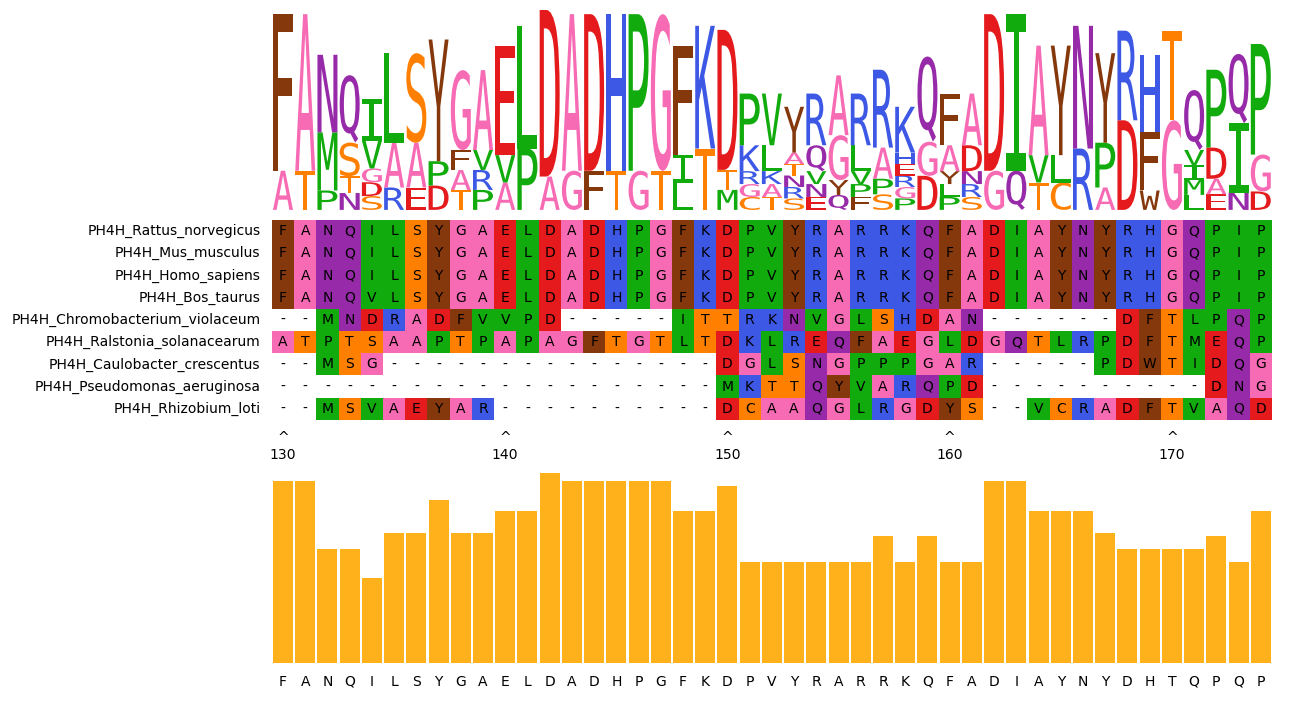

In [20]:
height = 2
width = height * seq.shape[1] / seq.shape[0]

ch = ma.CatHeatmap(seq.to_numpy(), palette=color_encode, height=height, width=width)
ch.add_layer(ma.plotter.TextMesh(seq.to_numpy()))
ch.add_top(ma.plotter.SeqLogo(logo, color_encode=color_encode), pad=.1, size=2)
ch.add_left(ma.plotter.Labels(seq.index), pad=.1)
ch.add_bottom(ma.plotter.Labels(mock_ticks, rotation=0), pad=.1)
ch.add_bottom(ma.plotter.Labels(position, rotation=0))
ch.add_bottom(ma.plotter.Numbers(freq, width=.9, color="#FFB11B", show_value=False),
              name="freq_bar", size=2)
ch.add_bottom(ma.plotter.Labels(max_aa, rotation=0), pad=.1)
ch.render()

ch.get_ax("freq_bar").set_axis_off()

# 레 미제라블 아크 다이어그램

이 예제에서는 네트워크 데이터로 아크 다이어그램을 만드는 방법을 보여줍니다.

## 데이터 불러오기

In [12]:
data = ma.load_data('les_miserables')
nodes = data['nodes']
links = data['links']

sizes = nodes['value'].to_numpy().reshape(1, -1)
colors = nodes['group'].to_numpy().reshape(1, -1)
data

{'nodes':                name  group  value
 0            Myriel      1     31
 1          Napoleon      1      0
 2   Mlle.Baptistine      1      9
 3      Mme.Magloire      1      3
 4      CountessdeLo      1      0
 ..              ...    ...    ...
 72        Toussaint      5      0
 73           Child1     10      3
 74           Child2     10      0
 75           Brujon      4      0
 76    Mme.Hucheloup      8      0
 
 [77 rows x 3 columns],
 'links':      source  target
 0         1       0
 1         2       0
 2         3       0
 3         3       2
 4         4       0
 ..      ...     ...
 249      76      66
 250      76      63
 251      76      62
 252      76      48
 253      76      58
 
 [254 rows x 2 columns]}

## 아크 다이어그램 그리기

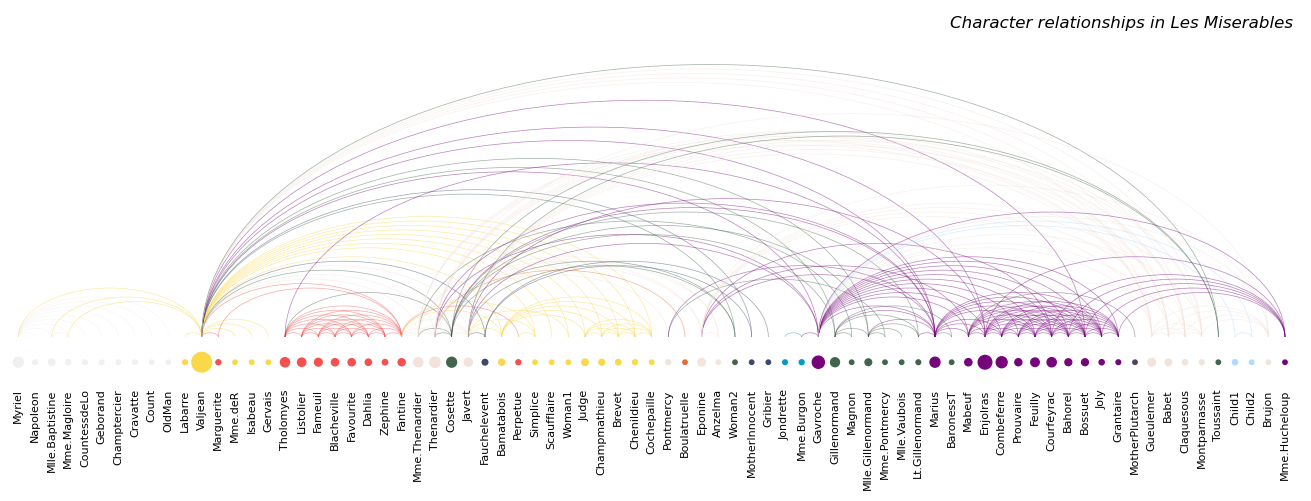

In [13]:
palette = {
    0: "#3C486B",
    1: "#F0F0F0",
    2: "#F9D949",
    3: "#F45050",
    4: "#F2E3DB",
    5: "#41644A",
    6: "#E86A33",
    7: "#009FBD",
    8: "#77037B",
    9: "#4F4557",
    10: "#B0DAFF"
}

link_colors = [palette[nodes.iloc[i].group] for i in links['source']]

height = .5
width = height * len(nodes) / 3

sh = ma.SizedHeatmap(sizes, colors, palette=palette, sizes=(10, 200),
                     frameon=False, height=height, width=width)
sh.add_bottom(mp.Labels(nodes['name'], fontsize=8))
arc = mp.Arc(nodes.index, links.to_numpy(),
             colors=link_colors, lw=.5, alpha=.5)
sh.add_top(arc, size=3)
sh.add_title(top="Character relationships in Les Miserables",
             align="right", fontstyle="italic")
sh.render()

# 마우스 배아(Mouse Embryo)

마우스 배아의 세포 지도를 그리는 방법입니다.

## 데이터셋 불러오기 및 전처리

In [14]:
from legendkit import cat_legend
from matplotlib.colors import LinearSegmentedColormap

embryo = ma.load_data('mouse_embryo')

xmax = embryo['cell_x'].max()
ymax = embryo['cell_y'].max()
xstart, xend = -xmax * 0.05, xmax * 1.05
ystart, yend = -ymax * 0.05, ymax * 1.05

xrange = np.linspace(xstart, xend, 200)
yrange = np.linspace(ystart, yend, 200)

xmid = (xrange[1:] + xrange[:-1]) / 2
ymid = (yrange[1:] + yrange[:-1]) / 2


def get_xy_hist(ct):
    x = embryo[embryo['cell_type'] == ct]['cell_x'].to_numpy()
    y = embryo[embryo['cell_type'] == ct]['cell_y'].to_numpy()
    xhist, _ = np.histogram(x, bins=xrange)
    yhist, _ = np.histogram(y, bins=yrange)
    return xhist, yhist

embryo

,cell_x,cell_y,cell_type,timepoint,colors
0,133.599963,316.800580,Cavity,E12.5,#6d32e6
1,132.733938,316.300580,Cavity,E12.5,#6d32e6
2,131.867912,315.800580,Brain,E12.5,#bf024f
3,131.001887,315.300580,Brain,E12.5,#bf024f
4,130.135861,314.800580,Brain,E12.5,#bf024f
...,...,...,...,...,...
51360,4.928203,243.666605,Cavity,E12.5,#6d32e6
51361,4.062178,243.166605,Cavity,E12.5,#6d32e6
51362,3.196152,242.666605,Cavity,E12.5,#6d32e6
51363,2.330127,242.166605,Cavity,E12.5,#6d32e6


각 세포 유형에 대한 색상을 지정하고 시각화합니다.

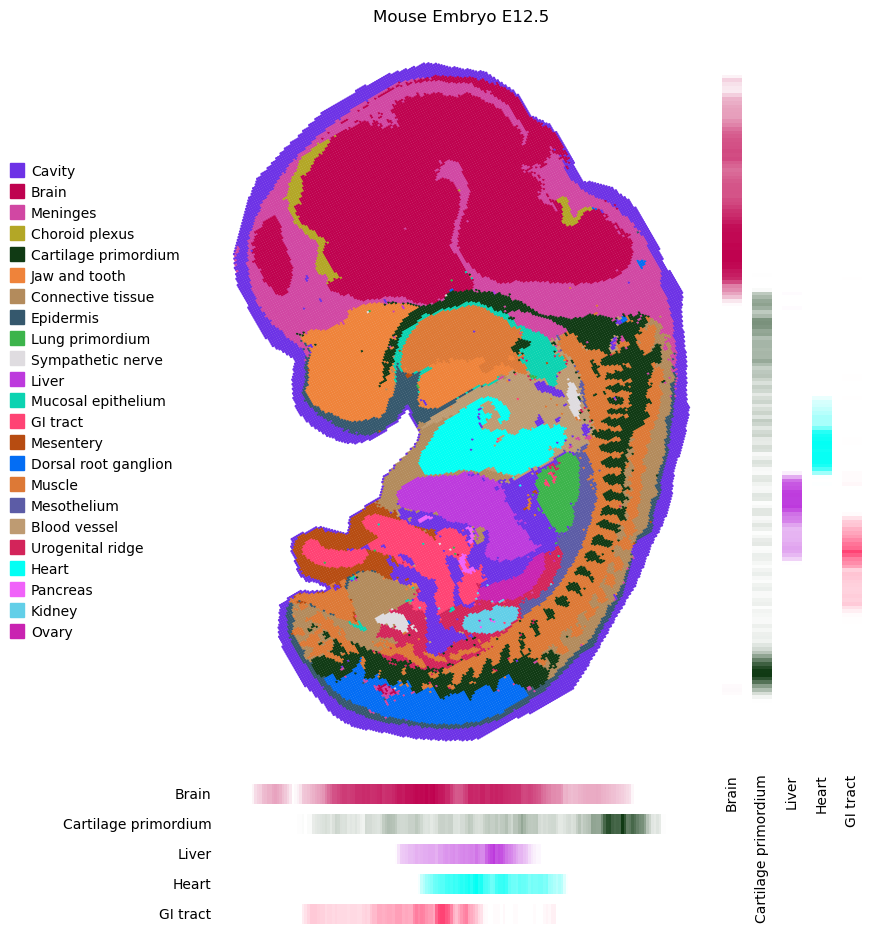

In [15]:
colormap = {
    'Cavity': '#6d32e6',
    'Brain': '#bf024f',
    'Meninges': '#d147a3',
    'Choroid plexus': '#b3a726',
    'Cartilage primordium': '#103a14',
    'Jaw and tooth': '#ef833a',
    'Connective tissue': '#b38b5c',
    'Epidermis': '#35586d',
    'Lung primordium': '#3cb44b',
    'Sympathetic nerve': '#dfdce0',
    'Liver': '#bd3add',
    'Mucosal epithelium': '#0bd3b1',
    'GI tract': '#ff4374',
    'Mesentery': '#b74c11',
    'Dorsal root ganglion': '#036df4',
    'Muscle': '#dd7936',
    'Mesothelium': '#5c5ca6',
    'Blood vessel': '#be9b72',
    'Urogenital ridge': '#d3245a',
    'Heart': '#03fff4',
    'Pancreas': '#f062f9',
    'Kidney': '#62cfe8',
    'Ovary': '#c923b1'
}

width = 5
height = width * (yend - ystart) / (xend - xstart)
b = ma.WhiteBoard(height=height, width=width)

cell_types = ["Brain", "Cartilage primordium", "Liver", "Heart", "GI tract"]
for n in cell_types:
    b.add_canvas("bottom", size=.2, pad=.1, name=f"{n}-x")
    b.add_canvas("right", size=.2, pad=.1, name=f"{n}-y")
b.render()

# Draw cell
ax = b.get_main_ax()
points = ax.scatter(embryo['cell_x'], embryo['cell_y'], s=1, c=embryo['colors'])
points.set_rasterized(True)
ax.set_xlim(xstart, xend)
ax.set_ylim(ystart, yend)
ax.set_title("Mouse Embryo E12.5")
ax.set_axis_off()

colors = list(colormap.values())
labels = list(colormap.keys())
cat_legend(colors=colors, labels=labels, ax=ax, loc="out left center", fontsize=10)

for n in cell_types:
    xh, yh = get_xy_hist(n)
    cmap = LinearSegmentedColormap.from_list(n, ["white", colormap[n]])
    x_ax = b.get_ax(f"{n}-x")
    x_ax.pcolormesh(xh.reshape(1, -1), cmap=cmap)
    x_ax.set_axis_off()
    x_ax.text(0, .5, n, va="center", ha="right", transform=x_ax.transAxes)

    y_ax = b.get_ax(f"{n}-y")
    y_ax.pcolormesh(yh.reshape(-1, 1), cmap=cmap)
    y_ax.set_axis_off()
    y_ax.text(0.5, 0, n, va="top", ha="center", rotation=90, transform=y_ax.transAxes)

# Single-cell RNA-seq 시각화


`pbmc3k` 데이터를 가지고 간단한 시각화를 해봅니다.

In [16]:
from matplotlib.colors import Normalize
from sklearn.preprocessing import normalize

pbmc3k = ma.load_data("pbmc3k")
exp = pbmc3k['exp']
pct_cells = pbmc3k['pct_cells']
count = pbmc3k['count']

matrix = normalize(exp.to_numpy(), axis=0)

cell_cat = ['Lymphoid', 'Myeloid', 'Lymphoid', 'Lymphoid',
            'Lymphoid', 'Myeloid', 'Myeloid', 'Myeloid']
cell_names = ['CD4 T', 'CD14\nMonocytes', 'B', 'CD8 T', 'NK',
              'FCGR3A\nMonocytes', 'Dendritic', 'Megakaryocytes']
pct_cells

,S100A8,FCER1A,FCGR3A,GNLY,PPBP,MS4A1,KLRB1,LGALS3,CST3,CD79A,NKG7
Cell Type,,,,,,,,,,,
CD4 T,11.443850,1.390374,5.989305,12.513369,1.497326,5.668449,5.668449,10.481283,23.101604,5.775401,16.470588
CD14 Monocytes,30.056180,0.280899,3.019663,3.862360,1.544944,1.615169,0.351124,22.120787,30.337079,1.193820,5.617978
B,3.409091,0.126263,1.641414,3.409091,0.631313,37.247475,0.000000,1.893939,7.702020,40.404040,3.535354
CD8 T,2.968750,0.625000,9.843750,13.125000,0.781250,2.500000,7.968750,7.812500,8.906250,1.093750,44.375000
NK,15.303430,0.131926,22.823219,3.825858,2.110818,2.110818,0.263852,17.414248,26.385224,1.187335,8.443272
FCGR3A Monocytes,2.622378,0.349650,23.776224,27.097902,0.000000,1.573427,5.944056,2.447552,6.993007,0.524476,28.671329
Dendritic,10.714286,21.428571,4.285714,5.714286,0.714286,2.142857,0.000000,16.428571,25.714286,4.285714,8.571429
Megakaryocytes,9.677419,0.000000,3.225806,0.000000,41.935484,0.000000,0.000000,9.677419,25.806452,3.225806,6.451613


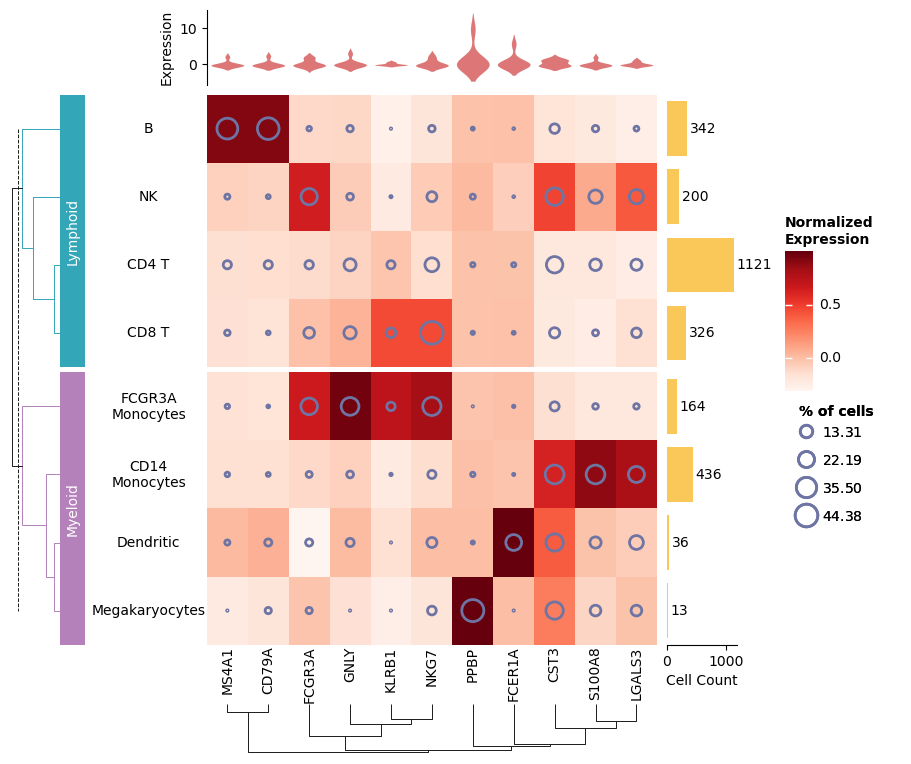

In [17]:
# Make plots
cells_proportion = mp.SizedMesh(
    pct_cells, size_norm=Normalize(vmin=0, vmax=100),
    color="none", edgecolor="#6E75A4", linewidth=2, sizes=(1, 600),
    size_legend_kws={"title": "% of cells", "show_at": [.3, .5, .8, 1]}
)
mark_high = mp.MarkerMesh(matrix > 0.7, color="yellow", label="High")
cell_count = mp.Numbers(count['Value'], color="#fac858", label="Cell Count")
cell_exp = mp.Violin(exp, label="Expression", linewidth=0, color="#ee6666",
                     density_norm="count")
cell_types = mp.Labels(cell_names, align="center")
gene_names = mp.Labels(exp.columns)

# Group plots together
h = ma.Heatmap(matrix, cmap="Reds", label="Normalized\nExpression",
               width=4.5, height=5.5)
h.add_layer(cells_proportion)
# h.add_layer(mark_high)
h.add_right(cell_count, pad=.1, size=.7)
h.add_top(cell_exp, pad=.1, size=.75, name="exp")
h.add_left(cell_types)
h.add_bottom(gene_names)

h.hsplit(labels=cell_cat, order=['Lymphoid', 'Myeloid'])
h.add_left(mp.Chunk(['Lymphoid', 'Myeloid'], ["#33A6B8", "#B481BB"]),
           pad=.05)
h.add_dendrogram("left", colors=["#33A6B8", "#B481BB"])
h.add_dendrogram("bottom")
h.add_legends("right", align_stacks="center", align_legends="top", pad=.2)
h.set_margin(.2)
h.render()


# 나가며

`Marsilea`는 `Matplotlib`을 기반으로 복잡하고 다양한 시각화를 할 수 있는 편리한 API를 제공합니다. 그러나 아직 베타 단계(현재 버전은 0.3.5)임으로 여기서 사용된 `API`가 변경되거나 알수없는 버그가 발생할 수 있습니다.